#### DS 3000 - Phase 4
Kat Dizon, Kirtana Krishnan, Regina Rabkina, Karen Vides

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsRegressor


#Read the CSV file 
spotify_df= pd.read_csv("spotify-2023.csv", encoding="ISO-8859-1")

In [2]:
#Looking at the range of released years
spotify_df.tail()
spotify_df["released_year"].value_counts()

2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: released_year, dtype: int64

In [3]:
#Looking at variables' datatypes
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## EDA Step 1 - Remove Columns

In [4]:
#remove columns unrelated to spotify 
spotify_df = spotify_df.drop(columns=["in_apple_playlists", "in_apple_charts", "in_deezer_playlists","in_deezer_charts", "in_shazam_charts"])

We decided to remove the columns that were unrelated to Spotify data (such as "in_apple_playlists") because we are only going to be focusing on Spotify for this data analysis.

In [5]:
spotify_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'bpm', 'key', 'mode', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%'],
      dtype='object')

## Step 2 - Missing Values

In [6]:
#count the missing values in each column
nan_values = spotify_df.isna().sum()
print("\nMissing Value Counts in Each Column:")
print(nan_values)


Missing Value Counts in Each Column:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [7]:
#address the missing values
spotify_df["key"].fillna("-", inplace=True)
spotify_df.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

We filled the missing "key" values with "-".

## Step 3 - Convert to Appropriate Data Types

In [8]:
#converts columns to appropriate data types
spotify_df["track_name"] = spotify_df["track_name"].astype("string")
spotify_df["artist(s)_name"] = spotify_df["artist(s)_name"].astype("string")

#convert to numeric, if there are errors, fill with NaN
spotify_df["streams"] = pd.to_numeric(spotify_df["streams"], errors="coerce")

In [9]:
spotify_df.dtypes

track_name               string
artist(s)_name           string
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [10]:
spotify_df.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 1
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

## Step 4 - Drop Row with Null Value

In [11]:
#drop row with the null value in streams
spotify_df.dropna(subset=["streams"], inplace=True)
spotify_df.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

We noticed that there was 1 NaN value in "streams", so we decided to delete this entry because we declared "streams" as our target variable.

In [12]:
missing_values = spotify_df.isnull().sum()
print(missing_values)

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


#### Encoding the 'mode' and 'key' columns

In [13]:
#One-Hot Encoding for 'mode'
#creating a DataFrame of one-hot encoded values
mode_encoded = pd.get_dummies(spotify_df['mode'], prefix='mode')

#concatenating the one-hot encoded DataFrame to the original DataFrame
spotify_df = pd.concat([spotify_df, mode_encoded], axis=1)

#'mode' was being encoded into 0s and 1s, so we converted them to Boolean
spotify_df['mode_Major'] = spotify_df['mode_Major'].astype(bool)
spotify_df['mode_Minor'] = spotify_df['mode_Minor'].astype(bool)


#label encoding for 'key'
#initiating the label encoder
label_encoder = LabelEncoder()

#creating a new column for encoded 'key' values
spotify_df['key_encoded'] = label_encoder.fit_transform(spotify_df['key'].astype(str))

#print updated DataFrame with new encoded columns alongside original 'mode' and 'key'
print("\nUpdated Data with Encoded Categorical Variables:")
print(spotify_df[['mode', *mode_encoded.columns, 'key', 'key_encoded']].head())


Updated Data with Encoded Categorical Variables:
    mode  mode_Major  mode_Minor key  key_encoded
0  Major        True       False   B            3
1  Major        True       False  C#            4
2  Major        True       False   F            8
3  Major        True       False   A            1
4  Minor       False        True   A            1


## Data Analysis

In [14]:
print(spotify_df.describe())

       artist_count  released_year  released_month  released_day  \
count    952.000000     952.000000      952.000000    952.000000   
mean       1.556723    2018.288866        6.038866     13.944328   
std        0.893331      11.011397        3.564571      9.197223   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams         bpm  \
count            952.000000         952.000000  9.520000e+02  952.000000   
mean            5202.565126          12.022059  5.141374e+08  122.553571   
std             7901.400683          19.582405  5.668569e+08   28.069601   
min               31.000000           0.000000  2.762000e+03   65.000000   
25%    

## Visualizing Numerical Columns

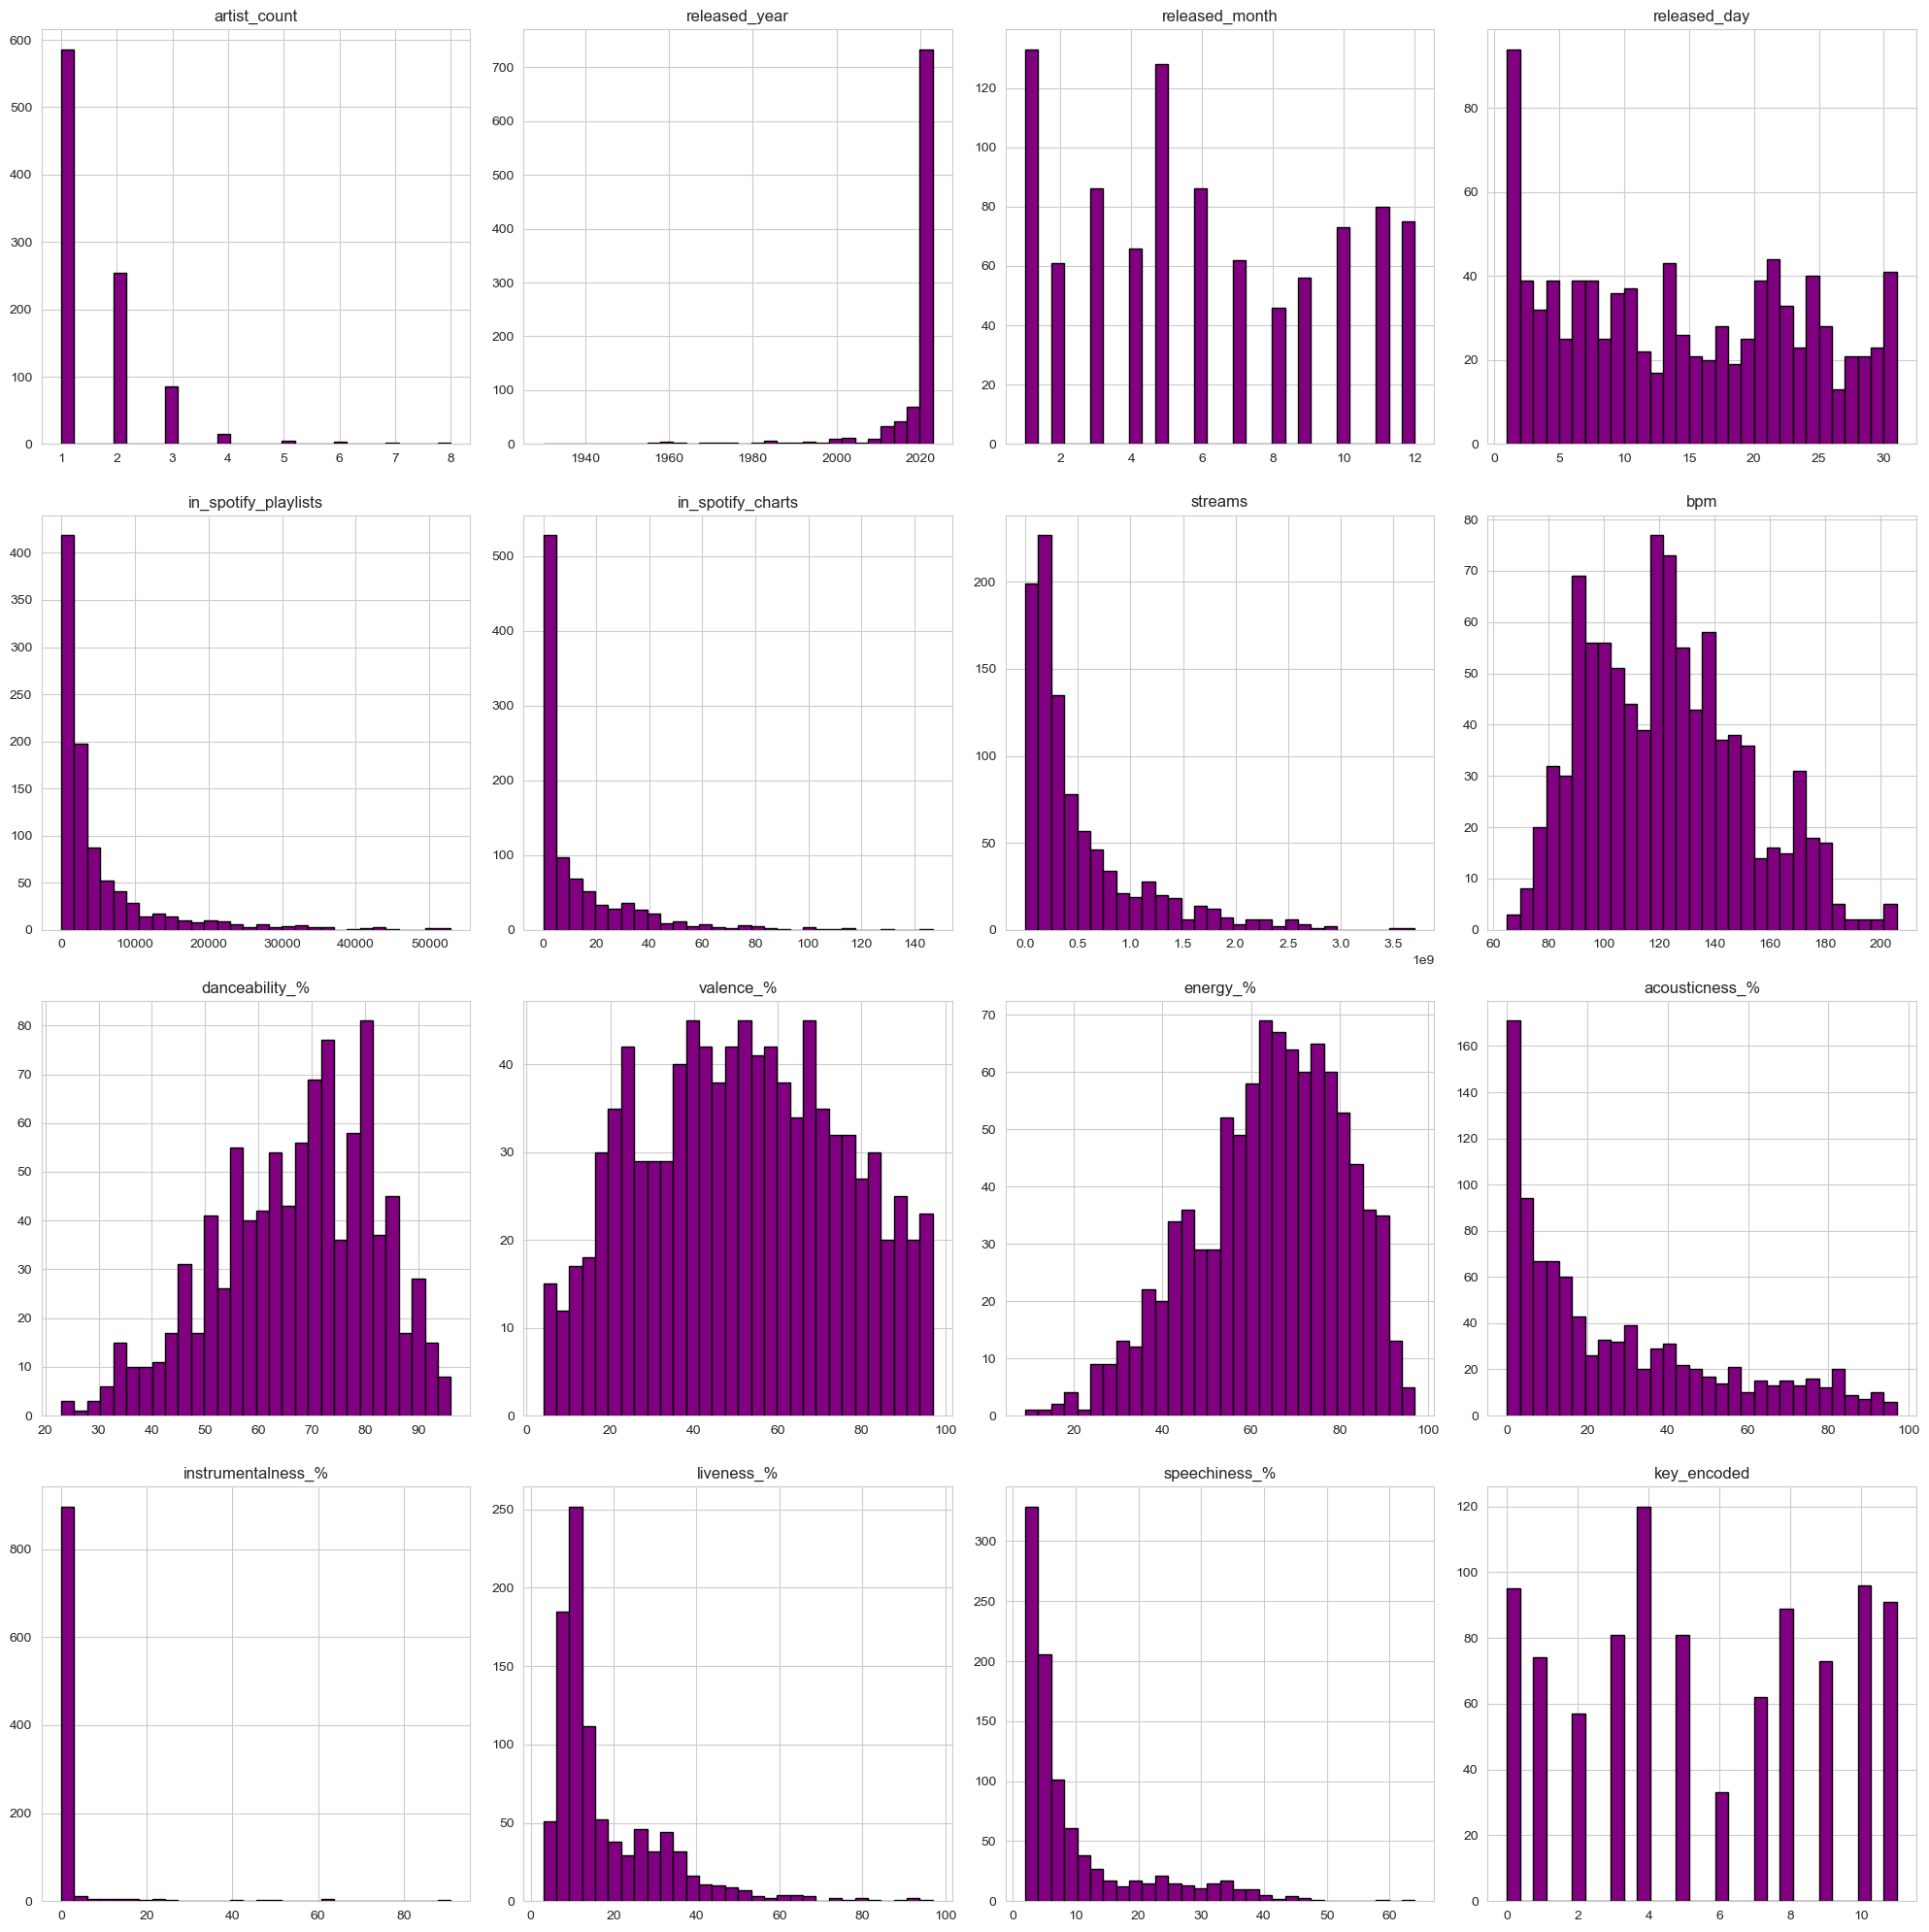

In [15]:
#set style
sns.set_style("whitegrid")

#plotting histograms for all numerical columns
spotify_df.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(20,20), color='purple', edgecolor='black')
plt.tight_layout()  
plt.show()

### Main Observations
1) In 'artist_count', the highest frequency being at 1 indicates that most songs in this data set are performed by a single artist. There are a few songs with multiple artists as well though.

2) In 'released_year', the peak is occurs in the 2020s, indicating most of the songs in this dataset have been very recently released. It is important to acknowledge that are several songs that have been released prior to the 2020s, however, most songs have been released after the 2000s in this data.

3) In 'released_month', the most favored months for song releases tend to be 1 (January) and 5 (May). This trend may be due to industry norms and/or seasonal inclinations.

4) In 'released_day', it's evident that song releases are typically spread throughout the month, with a minor rise at the beginning and middle of the month.

5) In in_spotify_playlists and in_spotify_charts, most songs either are barely in playlists/charts or are in plenty of playlists/charts; however, there's a small group of songs that dominate since they frequently appear in various  playlists or end up on the charts.

6) In bpm, there is a wide variety of bpm values, with a noticeable concentration around 80-120 bpm, indicating the popularity of a moderate tempo.
    

  In the remaining metrics, there are varying degrees of skewness. However, most, such as danceability and energy, showcase a broad distribution, highlighting diversified musical characteristics.







## Preliminary Modeling Efforts

In [16]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

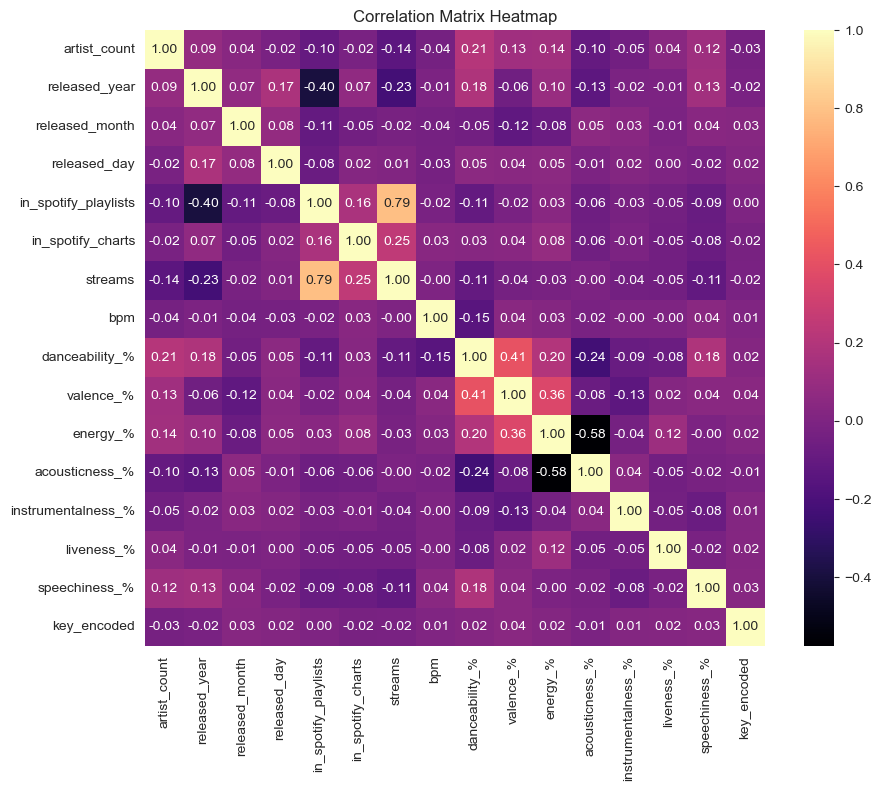

In [17]:
#select only numeric columns
numeric_data = spotify_df.select_dtypes(include=[np.number])

#create the correlation matrix
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

The strongest positive correlation in the heatmap is 0.79 with streams and in_spotify_playlists.

The strongest negative correlation in the heatmap is -0.58 with acousticness and energy.


In [18]:
spotify_df_copy = spotify_df.copy()

In [19]:
# Set max columns to display
pd.set_option('display.max_columns', None)

print(spotify_df_copy.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'bpm', 'key', 'mode', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%', 'mode_Major', 'mode_Minor',
       'key_encoded'],
      dtype='object')


## Model 1: Decision Tree

In [20]:
#encode the categorical feature
spotify_df_copy = pd.get_dummies(spotify_df_copy, drop_first=True) 

In [21]:
X   = spotify_df_copy.drop('streams', axis=1) #get the input features
y   = spotify_df_copy['streams']              #get the target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7 #reproduce the results
                                                   )

In [22]:
dt = DecisionTreeRegressor(random_state=7)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=7)

In [23]:
#predict the labels for the test set
y_pred   = dt.predict(X_test)
print('The predicted streams is: {}'.format(y_pred))

The predicted streams is: [1.84807630e+08 1.15331792e+08 1.31746175e+08 3.17622165e+08
 3.30881149e+08 3.62361576e+08 8.95665120e+07 8.11022530e+07
 5.36034470e+07 4.48843705e+08 2.25093344e+08 2.82883169e+08
 2.13515845e+09 7.26307468e+08 2.64717480e+08 1.23124076e+08
 5.73127350e+07 9.33815613e+08 1.95918494e+08 1.12746825e+09
 2.66534392e+09 1.02318713e+09 9.33815613e+08 1.90625045e+08
 4.62791599e+08 1.52850295e+08 2.12234990e+08 7.26837877e+08
 8.26623384e+08 3.11482393e+08 3.74706940e+08 1.59290979e+09
 1.65584767e+08 7.51134527e+08 5.27033089e+08 5.78207856e+08
 1.76290831e+08 1.15331792e+08 1.80661770e+09 5.02574952e+08
 1.98883004e+08 2.30303397e+09 4.66214729e+08 2.71666301e+08
 5.73127350e+07 1.58950978e+08 1.36689549e+08 1.83706234e+08
 2.49756530e+07 1.60522451e+09 2.71392235e+09 4.96795686e+08
 2.63894529e+08 8.81038480e+07 7.21975598e+08 1.44565150e+08
 8.12019557e+08 2.02452860e+08 1.30218409e+09 7.73096110e+07
 1.81382590e+08 2.82883169e+08 2.82883169e+08 2.49756530e+0

In [24]:
# Evaluate the Predictions
r2 = r2_score(y_test, y_pred)
rounded_r2 = round(r2, 2)
print("R-squared:", rounded_r2)

R-squared: 0.71


Our model has a relatively high r-squared value, indicating a moderately strong relationship between the variables in our model.

## Decision Tree Tuning

In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search through
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [26]:
# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=7)

In [27]:
# Create the Grid Search object
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='r2')
dt_grid.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", dt_grid.best_params_)
print("Best R-squared:", round(dt_grid.best_score_, 2))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R-squared: 0.71


After performing tuning, we noticed there has been no change in our R-squared. We suspect this is due to the fact that our model was already performing close to its maximum potential. 

## Model 2: k-Nearest Neighbors Regressor

In [28]:
#encode the categorical feature
spotify_df_copy = pd.get_dummies(spotify_df_copy, drop_first=True) 

In [29]:
X   = spotify_df_copy.drop('streams', axis=1) #get the input features
y   = spotify_df_copy['streams']              #get the target

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [30]:
# Apply feature scaling to numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
knn_regressor = KNeighborsRegressor(n_neighbors=5) 
knn_regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [32]:

# predict the labels for the test set
y_pred = knn_regressor.predict(X_test_scaled)

if y_test is not None and y_pred is not None:
    r2 = r2_score(y_test, y_pred)
    print("R-squared:", round(r2,2))
else:
    print("Error: y_test or y_pred is None") 

R-squared: -0.32


Our R-squared for k-Nearest Neighbors is negative, possibly indicating that this model doesn't fit our dataset well. We will now tune this model to see if there's any improvement.

## k-Nearest Neighbors Regressor Tuning

In [33]:
param_grid = {'n_neighbors': np.arange(1, 21)}

In [34]:
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='neg_mean_squared_error')

In [35]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)


r2 = r2_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Best R-squared:", round(r2,2))

Best Parameters: {'n_neighbors': 15}
Best R-squared: 0.08


There has been a slight improvement in the R-squared metric; however, the value is still very small, so this model is most likely not the best option for our data.

## Model 3: Random Forest Regressor

In [36]:
X   = spotify_df_copy.drop('streams', axis=1) #get the input features
y   = spotify_df_copy['streams']    #get the target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7 #reproduce the results
                                                   )

In [37]:
rf = RandomForestRegressor(random_state=7)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=7)

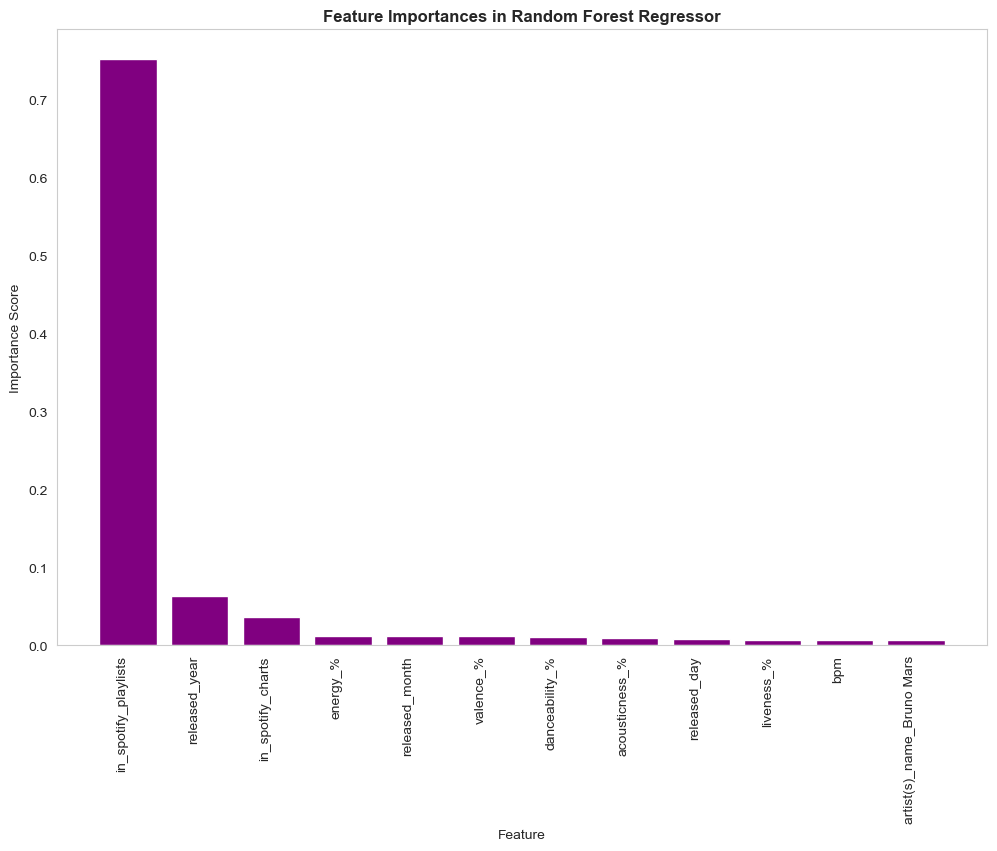

In [38]:
feature_importances = rf.feature_importances_
feature_importances /= feature_importances.sum()

# Sort feature importances
indices = np.argsort(feature_importances)[::-1]

# Plotting
top_n = 12
plt.figure(figsize=(12, 8))
plt.bar(range(top_n), feature_importances[indices][:top_n], align="center", color='purple')
plt.xticks(range(top_n), X.columns[indices][:top_n], rotation=90, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances in Random Forest Regressor", fontweight='bold')
plt.grid(False)

plt.show()

In [39]:
#predict the labels for the test set
y_pred   = rf.predict(X_test)

print('The predicted streams is: {}'.format(y_pred))

The predicted streams is: [2.03168521e+08 1.31360399e+08 1.51378742e+08 2.85714641e+08
 1.30686139e+08 3.22547066e+08 1.21124130e+08 6.33653295e+07
 1.39878074e+08 4.53049694e+08 2.25716012e+08 3.64929876e+08
 1.73062694e+09 5.24693263e+08 2.90788156e+08 1.02669424e+08
 5.70719545e+07 1.31533828e+09 3.27777359e+08 1.13098904e+09
 2.00745027e+09 8.26069477e+08 1.55468083e+09 2.76611177e+08
 7.62126324e+08 1.14627282e+08 1.62517315e+08 7.97798160e+08
 9.98072963e+08 6.08374362e+08 4.68351596e+08 1.36227635e+09
 1.10029516e+08 6.25307476e+08 5.29216473e+08 5.68108491e+08
 1.74153097e+08 1.92111462e+08 1.54039510e+09 6.49648882e+08
 2.15148239e+08 1.98003432e+09 4.98128589e+08 2.85122854e+08
 7.13746361e+07 1.73414909e+08 2.14283042e+08 1.65027783e+08
 6.98302655e+07 1.92352427e+09 2.00240008e+09 4.56954259e+08
 1.65374678e+08 1.92937434e+08 6.22345312e+08 1.99766147e+08
 8.26287864e+08 1.60051630e+08 1.05171804e+09 2.97189922e+08
 2.23419991e+08 5.25609899e+08 3.66631736e+08 4.03634855e+0

In [40]:
# Evaluate the Predictions
r2 = r2_score(y_test, y_pred)
rounded_r2 = round(r2, 2)
print("R-squared:", rounded_r2)

R-squared: 0.81


Our R-squared value for Random Forest is the greatest out of the three models, indicating that the model fits the data well and can provide relatively accurate predictions. We will now tune this to see if we can get better predictions.

## Random Forest Regressor Tuning

In [41]:
# Define the parameter grid to search through
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [42]:
# Create a RandomForestRegressor instance
rf = RandomForestRegressor(random_state=7)

In [43]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator = rf, param_grid = params, cv=5, return_train_score = True) 

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(round(grid_search.best_score_), 2)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
1 2


In [44]:
#display the cv results for the train and test set
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
57,0.963505,0.001856,0.797556,0.016036
54,0.970807,0.001957,0.797083,0.014787
0,0.970819,0.001714,0.796779,0.017175
66,0.953097,0.002468,0.796455,0.019287
12,0.953104,0.002462,0.796450,0.019297


In [45]:
best_params = grid_search.best_params_

# Get the best model
best_rf = grid_search.best_estimator_

# Predict the labels for the test set using the best model
y_pred_best = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred_best)
print("Best Parameters:", best_params)
print("Best R-squared:", round(r2,2))

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best R-squared: 0.81


Our results indicate that the Random Forest Regressor Algorithm is best suited for predicting songs with the highest streams in our data set.